In [16]:
import cv2
import time
import os
import pandas as pd
import matplotlib.pyplot as plt
from ultralytics import YOLO

def detect_and_draw(model,durchläufe):
    verzeichnis = 'benchmarking/Laufzeit2'
    
    zeit = 0
    r = []
    #model = YOLO(model_name)
    for n in range(1,durchläufe+1):
        for datei in os.listdir(verzeichnis):
            path = os.path.join(verzeichnis,datei)
            image = cv2.imread(path)
            start_time = time.time()
            results = model(image)
            elapsedTime =time.time() - start_time
            zeit += elapsedTime
            r.append(elapsedTime)
        print(f'Durchlauf {n} done')
    return zeit/(len(os.listdir(verzeichnis))*n),r

In [17]:
models11 = ["yolo11m.pt", "yolo11s.pt", "yolo11n.pt"]
#models11 = ["yolo11l.pt","yolo11m.pt", "yolo11s.pt", "yolo11n.pt"]
# Modelle durchlaufen und Ergebnisse speichern
duration = []
zeiten = {}
minMax = []
durchläufe = 10

for model in models11:
   print(model)
   name = model
   model = YOLO(model)
   dt, r = detect_and_draw(model, durchläufe )
   duration.append(dt)
   zeiten[name] = r
   


yolo11m.pt

0: 384x640 1 person, 1 sports ball, 2370.6ms
Speed: 129.9ms preprocess, 2370.6ms inference, 54.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 sports ball, 1 orange, 1318.8ms
Speed: 13.0ms preprocess, 1318.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 991.1ms
Speed: 13.0ms preprocess, 991.1ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 sports ball, 1 apple, 1177.1ms
Speed: 8.0ms preprocess, 1177.1ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 apple, 1015.0ms
Speed: 6.0ms preprocess, 1015.0ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 cell phone, 1143.1ms
Speed: 17.0ms preprocess, 1143.1ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1061.5ms
Speed: 23.0ms preprocess, 1061.5ms inference, 4.0ms postprocess per image at shape (1, 

In [18]:
times = duration
times,models11

([0.7735665011405944, 0.36880560000737506, 0.20477928241093954],
 ['yolo11m.pt', 'yolo11s.pt', 'yolo11n.pt'])

In [19]:
fps = [1/i for i in times]
#fps

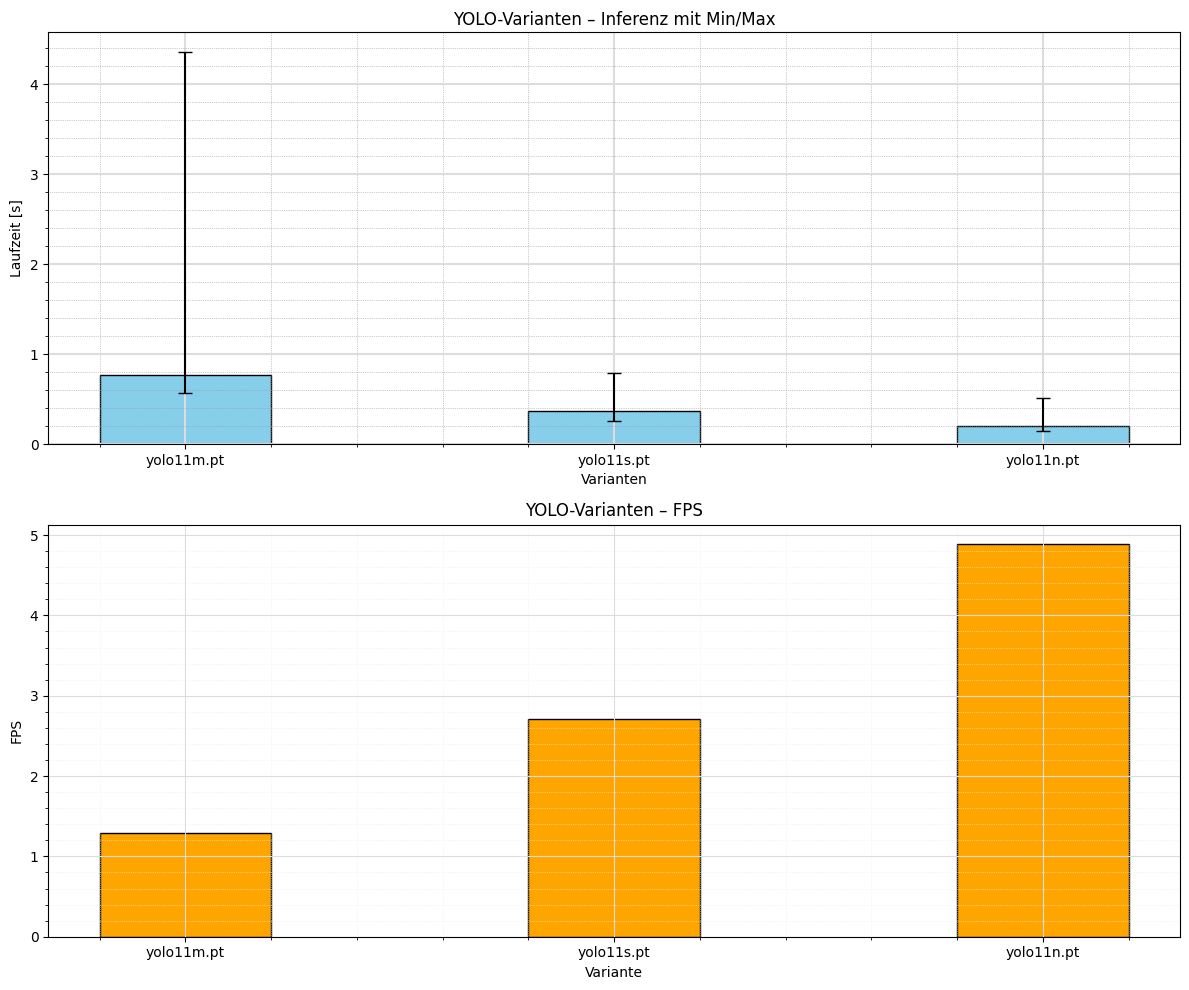

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 🧾 Daten vorbereiten
models11 = list(zeiten.keys())
laufzeit_daten = [zeiten[modell] for modell in models11]

# Mittelwert, Min, Max
times = [np.mean(d) for d in laufzeit_daten]
min_w = [np.min(d) for d in laufzeit_daten]
max_w = [np.max(d) for d in laufzeit_daten]

# Fehler nach unten (Mittelwert - Min) und oben (Max - Mittelwert)
yerr = [
    [mean - min_ for mean, min_ in zip(times, min_w)],  # unten
    [max_ - mean for mean, max_ in zip(times, max_w)]   # oben
]

# ⚠️ FPS-Liste muss existieren!
# Beispiel:
# fps = [2.0, 1.5, 1.1, 0.8]

# 🔧 Diagramme zeichnen
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# 1️⃣ Fehlerbalkendiagramm für Laufzeit
axes[0].bar(models11, times, yerr=yerr, capsize=5, width=0.4, edgecolor='black', color='skyblue')
axes[0].set_xlabel("Varianten")
axes[0].set_ylabel("Laufzeit [s]")
axes[0].set_title("YOLO-Varianten – Inferenz mit Min/Max")
axes[0].tick_params(axis='x', rotation=0)
axes[0].grid(True)

# 2️⃣ Balkendiagramm für FPS
axes[1].bar(models11, fps, width=0.4, edgecolor='black', color='orange')
axes[1].set_xlabel("Variante")
axes[1].set_ylabel("FPS")
axes[1].set_title("YOLO-Varianten – FPS")
axes[1].tick_params(axis='x', rotation=0)
import matplotlib.ticker as ticker
axes[0].grid(True)
# Für feines Grid auf der Y-Achse
axes[0].grid(which='major', color='#DDDDDD', linewidth=1.5)
# Show the minor grid as well. Style it in very light gray as a thin,
# dotted line.
axes[0].grid(which='minor', color='#999999', linestyle=':', linewidth=0.5)
# Make the minor ticks and gridlines show.
axes[0].minorticks_on()

#axes[0].grid(True, which='major', linestyle='--', alpha=0.4)
axes[1].grid(True)
# Für feines Grid auf der Y-Achse
axes[1].grid(which='major', color='#DDDDDD', linewidth=0.8)
# Show the minor grid as well. Style it in very light gray as a thin,
# dotted line.
axes[1].grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
# Make the minor ticks and gridlines show.
axes[1].minorticks_on()

plt.tight_layout()
plt.show()


In [23]:
times

[np.float64(0.7735665011405944),
 np.float64(0.36880560000737506),
 np.float64(0.20477928241093954)]

In [24]:
fps

[1.2927136820500085, 2.711455574373065, 4.883306495787285]

# Versuche: Nicht Relevant

In [38]:
models8 =    [ "yolov8l.pt", 
              "yolov8m.pt",
              "yolov8n.pt", 
              "yolov8s.pt",  
   
    ]

In [ ]:
duration8= []
for model in models8:
   print(model)
   model = YOLO(model)
   dt = detect_and_draw(model)
   duration8.append(dt)



NameError: name 'models8' is not defined

In [22]:
modelsonxx = ['yolo11m.onnx',
              'yolo11s.onnx',
              'yolo11n.onnx']

In [41]:
models8, duration8

(['yolov8l.pt', 'yolov8m.pt', 'yolov8n.pt', 'yolov8s.pt'],
 [1.9563523968060812,
  1.010023260116577,
  0.23081767559051514,
  0.46111560265223184])

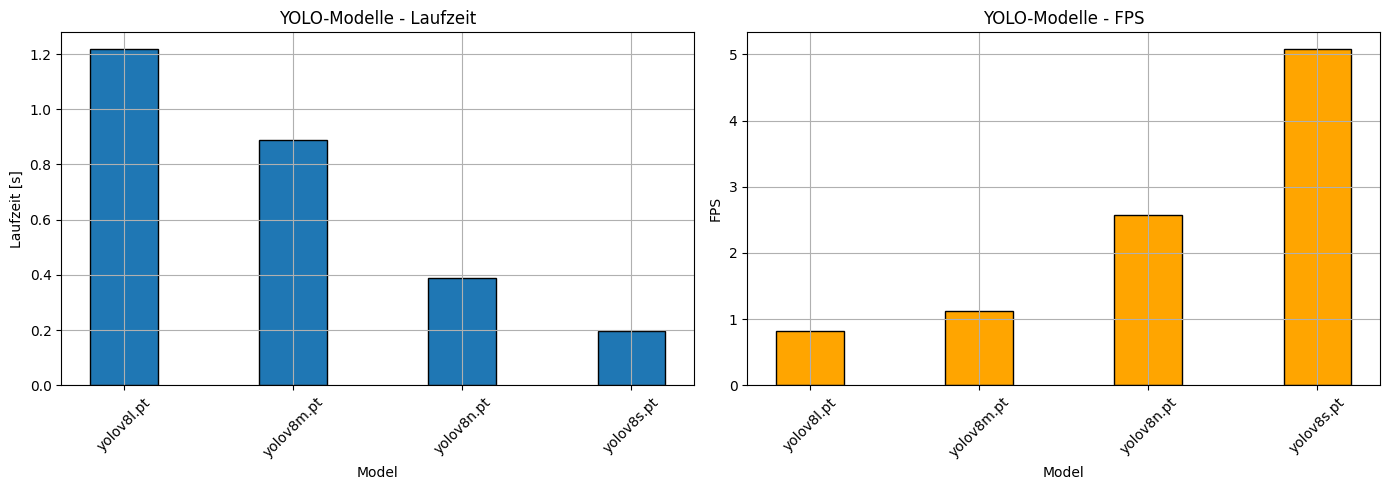

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Beispiel-Daten (falls names, times, fps noch nicht existieren)
# names = ["YOLOv8", "YOLOv9", "YOLOv10", "YOLOv11"]
# times = [0.5, 0.7, 0.9, 1.2]  # Beispielhafte Laufzeiten in Sekunden
# fps = [2.0, 1.5, 1.1, 0.8]  # Beispielhafte FPS-Werte

# Erstelle zwei nebeneinander liegende Plots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  # 1 Reihe, 2 Spalten

# 1️⃣ Diagramm für Laufzeit (times)
axes[0].bar(models8, times, width=0.4, edgecolor='black')
axes[0].set_xlabel("Model")
axes[0].set_ylabel("Laufzeit [s]")
axes[0].set_title("YOLO-Modelle - Laufzeit")
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True)

# 2️⃣ Diagramm für FPS (fps)
axes[1].bar(models8, fps, width=0.4, edgecolor='black', color='orange')  # Zweite Farbe für Unterschied
axes[1].set_xlabel("Model")
axes[1].set_ylabel("FPS")
axes[1].set_title("YOLO-Modelle - FPS")
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True)

# Anzeigen der Diagramme
plt.tight_layout()  # Verhindert Überlappungen
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Achsenbeschriftungen und Titel setzen
plt.xlabel("Model")
plt.ylabel("FPS")
plt.title("YOLO-Modelle - Laufzeit ")


plt.bar(models8, fps, width=0.4, edgecolor = 'black')
plt.xticks(rotation=45, ha="right")
plt.show


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Achsenbeschriftungen und Titel setzen
plt.xlabel("Model")
plt.ylabel("Laufzeit[s]")
plt.title("YOLO-Modelle - Laufzeit ")


plt.bar(models8, times, width=0.4, edgecolor = 'black')
plt.xticks(rotation=45, ha="right")
plt.grid()
plt.show


# Official Benchmarking

In [1]:
from ultralytics.utils.benchmarks import benchmark
benchmark(model="yolo11n.pt", data="coco8.yaml", imgsz=(424,240))

WARNING  imgsz=[424, 240] must be multiple of max stride 32, updating to [448, 256]


AssertionError: benchmark() only supports square imgsz.

In [7]:
benchmark(model="yolo11s.pt", data="coco8.yaml", imgsz=(424)) # size chosen becaue img is resized to quadratic one 

Setup complete  (8 CPUs, 5.9 GB RAM, 426.2/475.7 GB disk)

Benchmarks complete for yolo11s.pt on coco8.yaml at imgsz=448 (457.97s)
Benchmarks legend:  -  Success  -  Export passed but validation failed  -  Export failed
                   Format Status  Size (MB) metrics/mAP50-95(B) Inference time (ms/im)   FPS
0                 PyTorch              18.4              0.6383                 227.37   4.4
1             TorchScript              36.6              0.7196                 334.25  2.99
2                    ONNX              36.2              0.7196                 186.01  5.38
3                OpenVINO              36.4              0.7196                  261.8  3.82
4                TensorRT               0.0                   -                      -     -
5                  CoreML               0.0                   -                      -     -
6   TensorFlow SavedModel               0.0                   -                      -     -
7     TensorFlow GraphDef           

,Format,Status❔,Size (MB),metrics/mAP50-95(B),Inference time (ms/im),FPS
0,PyTorch,✅,18.4,0.6383,227.37,4.40
1,TorchScript,✅,36.6,0.7196,334.25,2.99
2,ONNX,✅,36.2,0.7196,186.01,5.38
3,OpenVINO,✅,36.4,0.7196,261.80,3.82
4,TensorRT,❌,0.0,NaN,NaN,NaN
5,CoreML,❌,0.0,NaN,NaN,NaN
6,TensorFlow SavedModel,❌,0.0,NaN,NaN,NaN
7,TensorFlow GraphDef,❌,0.0,NaN,NaN,NaN
8,TensorFlow Lite,❌,0.0,NaN,NaN,NaN
9,TensorFlow Edge TPU,❌,0.0,NaN,NaN,NaN


In [5]:
benchmark(model="yolo11n.pt", data="coco8.yaml", imgsz=(424)) # size chosen becaue img is resized to quadratic one 

Setup complete  (8 CPUs, 5.9 GB RAM, 425.9/475.7 GB disk)

Benchmarks complete for yolo11n.pt on coco8.yaml at imgsz=448 (442.68s)
Benchmarks legend:  -  Success  -  Export passed but validation failed  -  Export failed
                   Format Status  Size (MB) metrics/mAP50-95(B) Inference time (ms/im)    FPS
0                 PyTorch               5.4              0.5935                 228.54   4.38
1             TorchScript              10.5              0.6193                 316.01   3.16
2                    ONNX              10.1              0.6193                  67.26  14.87
3                OpenVINO              10.3              0.6193                  143.0   6.99
4                TensorRT               0.0                   -                      -      -
5                  CoreML               0.0                   -                      -      -
6   TensorFlow SavedModel               0.0                   -                      -      -
7     TensorFlow GraphDef   

,Format,Status❔,Size (MB),metrics/mAP50-95(B),Inference time (ms/im),FPS
0,PyTorch,✅,5.4,0.5935,228.54,4.38
1,TorchScript,✅,10.5,0.6193,316.01,3.16
2,ONNX,✅,10.1,0.6193,67.26,14.87
3,OpenVINO,✅,10.3,0.6193,143.00,6.99
4,TensorRT,❌,0.0,NaN,NaN,NaN
5,CoreML,❌,0.0,NaN,NaN,NaN
6,TensorFlow SavedModel,❌,0.0,NaN,NaN,NaN
7,TensorFlow GraphDef,❌,0.0,NaN,NaN,NaN
8,TensorFlow Lite,❌,0.0,NaN,NaN,NaN
9,TensorFlow Edge TPU,❌,0.0,NaN,NaN,NaN


In [6]:
benchmark(model="yolo11m.pt", data="coco8.yaml", imgsz=(424)) # size chosen becaue img is resized to quadratic one 

Setup complete  (8 CPUs, 5.9 GB RAM, 426.2/475.7 GB disk)

Benchmarks complete for yolo11m.pt on coco8.yaml at imgsz=448 (491.59s)
Benchmarks legend:  -  Success  -  Export passed but validation failed  -  Export failed
                   Format Status  Size (MB) metrics/mAP50-95(B) Inference time (ms/im)   FPS
0                 PyTorch              38.8              0.7801                 919.39  1.09
1             TorchScript              77.3              0.7439                 662.07  1.51
2                    ONNX              76.8              0.7439                  577.5  1.73
3                OpenVINO              77.1              0.7439                1420.98   0.7
4                TensorRT               0.0                   -                      -     -
5                  CoreML               0.0                   -                      -     -
6   TensorFlow SavedModel               0.0                   -                      -     -
7     TensorFlow GraphDef           

,Format,Status❔,Size (MB),metrics/mAP50-95(B),Inference time (ms/im),FPS
0,PyTorch,✅,38.8,0.7801,919.39,1.09
1,TorchScript,✅,77.3,0.7439,662.07,1.51
2,ONNX,✅,76.8,0.7439,577.50,1.73
3,OpenVINO,✅,77.1,0.7439,1420.98,0.70
4,TensorRT,❌,0.0,NaN,NaN,NaN
5,CoreML,❌,0.0,NaN,NaN,NaN
6,TensorFlow SavedModel,❌,0.0,NaN,NaN,NaN
7,TensorFlow GraphDef,❌,0.0,NaN,NaN,NaN
8,TensorFlow Lite,❌,0.0,NaN,NaN,NaN
9,TensorFlow Edge TPU,❌,0.0,NaN,NaN,NaN


# Store

In [8]:
from ultralytics import YOLO
import cv2
import time

In [ ]:
# # Eingabeordner mit Bildern
# #imgpath = r"C:\Users\nicos\OneDrive\Desktop\Mechatronik-Projekt\test\WhatsApp Bild 2025-03-09 um 11.03.48_b9241595.jpg"  # Ordner mit den Bildern

# # Liste der YOLO-Modelle
# models = [
#     "yolov8l.pt", "yolov9c.pt", "yolov10l.pt", "yolo11l.pt",
#     "yolov8n.pt", "yolov9t.pt", "yolov10n.pt", "yolo11n.pt", 
#     "yolov8s.pt", "yolov9s.pt", "yolov10s.pt", "yolo11s.pt", 
#     "yolov8m.pt", "yolov9m.pt", "yolov10m.pt", "yolo11m.pt", 
#     "yolov8l.pt", "yolov9c.pt", "yolov10l.pt", "yolo11l.pt",
    
    
# ]


In [7]:
from ultralytics import YOLO

# Modell laden
model = YOLO("yolo11n.pt")

# Modell in ONNX-Format exportieren
model.export(format="onnx")  # Erstellt 'yolo11_modell.onnx'


Ultralytics 8.3.70  Python-3.10.0 torch-2.6.0+cpu CPU (AMD Ryzen 7 3700U with Radeon Vega Mobile Gfx)


Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x000001FC9033D3F0>>
Traceback (most recent call last):
  File "c:\Users\nicos\OneDrive\Desktop\Mechatronik-Projekt\Code\git\git10\lib\site-packages\ipykernel\ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


YOLO11n summary (fused): 238 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs

PyTorch: starting from 'yolo11n.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (5.4 MB)

ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.48...
ONNX: export success  4.4s, saved as 'yolo11n.onnx' (10.2 MB)

Export complete (7.9s)
Results saved to C:\Users\nicos\OneDrive\Desktop\Mechatronik-Projekt\Code\git
Predict:         yolo predict task=detect model=yolo11n.onnx imgsz=640  
Validate:        yolo val task=detect model=yolo11n.onnx imgsz=640 data=/usr/src/ultralytics/ultralytics/cfg/datasets/coco.yaml  
Visualize:       https://netron.app


'yolo11n.onnx'

In [5]:
imgpath = r"C:\Users\nicos\Downloads\test.jpg"
models = [
    "yolo11l.pt",
    "yolo11m.pt",
    "yolo11n.pt",
    "yolo11s.pt",
    "yolov8l.pt",
    "yolov8m.pt",
    "yolov8n.pt",
    "yolov8s.pt",
    "yolov9l.pt",
    "yolov9m.pt",
    "yolov9n.pt",
    "yolov9s.pt",
    "yolov10l.pt",
    "yolov10m.pt",
    "yolov10n.pt",
    "yolov10s.pt"
]


In [3]:
def detect_and_draw(model, image_path, output_path):
    start_time = time.time()  # Startzeit erfassen
    
    
    
    
    # Modell laden (YOLOv8)
    model = YOLO("yolov8n.pt")  # Verwende "yolov8s.pt" für eine größere Version
    
    # Bild laden
    image = cv2.imread(image_path)
    if image is None:
        print("Fehler: Bild konnte nicht geladen werden.")
        return
    
    # Objekterkennung durchführen
    results = model(image)
    
    # Bounding-Boxen zeichnen
    for result in results:
        for box in result.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])  # Bounding-Box-Koordinaten
            conf = box.conf[0].item()  # Konfidenz
            cls = int(box.cls[0].item())  # Klassen-ID
            label = f"{model.names[cls]}: {conf:.2f}"
            
            # Zeichne Rechteck und Label
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
            
    end_time = time.time()  # Endzeit erfassen
    elapsed_time = end_time - start_time 
    fps = 1 / elapsed_time
    # Bild anzeigen
    cv2.imshow("Detected Objects", image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
    # Bild speichern
    cv2.imwrite(f"output_path_{elapsed_time}ms", image)
    print(f"Ergebnis gespeichert unter: {output_path}")

In [34]:
model = 'yolo11s.onnx'
outputPath = f"{model}Result"
detect_and_draw(model, imgpath, outputPath)

TypeError: detect_and_draw() takes 1 positional argument but 3 were given

In [ ]:
for model in models:
    outputPath = f"{model}Result"
    detect_and_draw(model, imgpath, outputPath)
    

In [ ]:
import cv2
import time
from ultralytics import YOLO
import os

# Eingabebild
input_path = r"C:\Users\nicos\Downloads\test.jpg"
laufzeiten = []
nObjects = []
# Liste der Modelle

models = [
    "yolov8n.pt",
    "yolov9t.pt",
    "yolov10n.pt",
    "yolo11n.pt",
    
    "yolov8s.pt",
    "yolov9s.pt",
    "yolov10s.pt",
    "yolo11s.pt",

    "yolov8m.pt",
    "yolov9m.pt",
    "yolov10m.pt",
    "yolo11m.pt",

    "yolov8l.pt",
    "yolov9c.pt",
    "yolov10l.pt",
    "yolo11l.pt"
]

models1 = [
    "yolov8n.pt",
    "yolov8s.pt",
    "yolov8m.pt",
    "yolov8l.pt",
    
    "yolov9t.pt",
    "yolov9s.pt",
    "yolov9m.pt",
    "yolov9c.pt",
    
    "yolov10n.pt",
    "yolov10s.pt",
    "yolov10m.pt",
    "yolov10l.pt",
    
    "yolo11n.pt",
    "yolo11s.pt",
    "yolo11m.pt",
    "yolo11l.pt"
]



# Ausgabeordner
output_directory = r"C:\Users\nicos\Downloads"

def detect_and_draw(model_name, image_path, output_directory):
    nObjects = 0
    test = [f for f in os.listdir(image_path)]
    
    for pic in test:
    
        image_path = os.path.jon(image_path, pic)
        
        # Modell laden
        model = YOLO(model_name)

        # Bild laden
        image = cv2.imread(image_path)
        if image is None:
            print(f"Fehler: Bild {image_path} konnte nicht geladen werden.")
            return
        
        start_time = time.time()
        # Objekterkennung durchführen
        results = model(image)
        # Anzahl erkannter Objekte speichern pro durchlauf
        nObjects = nObjects+(len(results))
        
        # Bounding-Boxen zeichnen
        for result in results:
            for box in result.boxes:
                x1, y1, x2, y2 = map(int, box.xyxy[0])  # Bounding-Box-Koordinaten
                conf = box.conf[0].item()  # Konfidenz
                cls = int(box.cls[0].item())  # Klassen-ID
                label = f"{model.names[cls]}: {conf:.2f}"

                # Zeichne Rechteck und Label
                cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
                cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        end_time = time.time()  # Endzeit erfassen
        elapsed_time = end_time - start_time  # Berechnete Laufzeit
        fps = 1 / elapsed_time if elapsed_time > 0 else 0  # FPS berechnen

        # Bild speichern
        output_path = f"{output_directory}\\{model_name}_Result{pic}_{elapsed_time:.4f}.jpg"
        cv2.imwrite(output_path, image)
        print(f"Ergebnis gespeichert unter: {output_path} | Laufzeit: {elapsed_time:.4f}s | FPS: {fps:.2f}")
        
    # Gesamtzahl aller erkannten Objekte pro Modell speichern
    nObjects.append(nObjects)

# Modelle durchlaufen und speichern



In [ ]:
for model in models:
    detect_and_draw(model, input_path, output_directory)

In [ ]:
!pip install ace_tools

In [ ]:
import ace_tools as tools


# Kamera intrinnsicen

In [2]:
import pyrealsense2 as rs

# Pipeline erstellen
pipeline = rs.pipeline()
context = rs.context()

# Erste verfügbare Kamera abrufen
devices = context.query_devices()
if not devices:
    print("Keine Intel RealSense Kamera gefunden!")
else:
    device = devices[0]  # Nimm das erste verfügbare Gerät
    print(f"Gefundene Kamera: {device.get_info(rs.camera_info.name)}")

    # Sensoren durchgehen (z. B. Farb- oder Tiefensensor)
    for sensor in device.sensors:
        print(f"\nSensor: {sensor.get_info(rs.camera_info.name)}")
        
        # Verfügbare Profile (Auflösungen, Formate, FPS) anzeigen
        for profile in sensor.get_stream_profiles():
            video_profile = profile.as_video_stream_profile()
            format_name = video_profile.format()
            width = video_profile.width()
            height = video_profile.height()
            fps = video_profile.fps()
            print(f"  - Format: {format_name}, Auflösung: {width}x{height}, FPS: {fps}")


Gefundene Kamera: Intel RealSense D435I

Sensor: Stereo Module
  - Format: format.y16, Auflösung: 1280x800, FPS: 25
  - Format: format.y16, Auflösung: 1280x800, FPS: 15
  - Format: format.y8, Auflösung: 1280x800, FPS: 30
  - Format: format.y8, Auflösung: 1280x800, FPS: 15
  - Format: format.y8, Auflösung: 1280x720, FPS: 30
  - Format: format.y8, Auflösung: 1280x720, FPS: 15
  - Format: format.y8, Auflösung: 1280x720, FPS: 6
  - Format: format.y8, Auflösung: 848x480, FPS: 90
  - Format: format.y8, Auflösung: 848x480, FPS: 60
  - Format: format.y8, Auflösung: 848x480, FPS: 30
  - Format: format.y8, Auflösung: 848x480, FPS: 15
  - Format: format.y8, Auflösung: 848x480, FPS: 6
  - Format: format.y8, Auflösung: 848x100, FPS: 300
  - Format: format.y8, Auflösung: 848x100, FPS: 100
  - Format: format.y8, Auflösung: 640x480, FPS: 90
  - Format: format.y8, Auflösung: 640x480, FPS: 60
  - Format: format.y8, Auflösung: 640x480, FPS: 30
  - Format: format.y8, Auflösung: 640x480, FPS: 15
  - Format

In [3]:
import pyrealsense2 as rs

# Pipeline für den Zugriff auf die Kamera starten
pipeline = rs.pipeline()
config = rs.config()
config.enable_stream(rs.stream.color, 640, 480, rs.format.bgr8, 30)

# Starten des Streams
pipeline.start(config)

# Erste Frames abrufen
frames = pipeline.wait_for_frames()
color_frame = frames.get_color_frame()

# Kameraparameter abrufen
intrinsics = color_frame.profile.as_video_stream_profile().get_intrinsics()

# Brennweite extrahieren
fx = intrinsics.fx  # Brennweite in Pixeln entlang der x-Achse
fy = intrinsics.fy  # Brennweite in Pixeln entlang der y-Achse

# Ausgabe der Brennweite
print(f"Focal Length (fx, fy): ({fx}, {fy}) pixels")

# Kamera-Stream stoppen
pipeline.stop()


Focal Length (fx, fy): (606.8787841796875, 607.022216796875) pixels


In [ ]:
from ultralytics.utils.benchmarks import benchmark
for model in models:
# Benchmark on GPU
    benchmark(model=model, data="coco8.yaml", imgsz=640, half=False, device="cpu")





In [32]:
import cv2
import time
import os
import numpy as np
import onnxruntime as ort

def detect_and_draw(model_path):
    verzeichnis = 'train/Laufzeit'
    gesamtzeit = 0
    zeiten_pro_bild = []

    # ONNX-Modell laden
    session = ort.InferenceSession(model_path)

    # Eingabenamen des Modells abrufen
    input_name = session.get_inputs()[0].name

    for n in range(2):  # Wiederholungsschleife
        for datei in os.listdir(verzeichnis):
            pfad = os.path.join(verzeichnis, datei)
            image = cv2.imread(pfad)

            # Bildvorverarbeitung
            input_image = cv2.resize(image, (640, 640))  # Anpassung an die Eingabegröße des Modells
            input_image = input_image.transpose(2, 0, 1)  # Umordnung der Achsen von HWC zu CHW
            input_image = input_image[np.newaxis, :, :, :].astype(np.float32) / 255.0  # Normalisierung und Hinzufügen der Batch-Dimension

            # Inferenz durchführen
            start_time = time.time()
            outputs = session.run(None, {input_name: input_image})
            elapsed_time = time.time() - start_time

            gesamtzeit += elapsed_time
            zeiten_pro_bild.append(elapsed_time)

    durchschnittszeit_pro_bild = gesamtzeit / len(zeiten_pro_bild)
    return durchschnittszeit_pro_bild, zeiten_pro_bild

# Beispielhafte Verwendung
modelle = ['yolo11n.onnx']  # Liste Ihrer ONNX-Modelle
dauer_pro_modell = []

for modell in modelle:
    print(f"Verarbeite Modell: {modell}")
    durchschnittszeit, zeiten = detect_and_draw(modell)
    dauer_pro_modell.append(durchschnittszeit)
    print(f"Durchschnittliche Zeit pro Bild: {durchschnittszeit:.4f} Sekunden")


Verarbeite Modell: yolo11n.onnx
Durchschnittliche Zeit pro Bild: 0.2079 Sekunden


In [33]:
1/durchschnittszeit

4.809419817012202